# ASSIGNMENT 2

# Part 1 (Visualizing a CNN with CIFAR10)
Train LeNet5 on CIFAR10

After training the CIFAR10 Dataset, below is the architecture framework of the network using tensorboard.

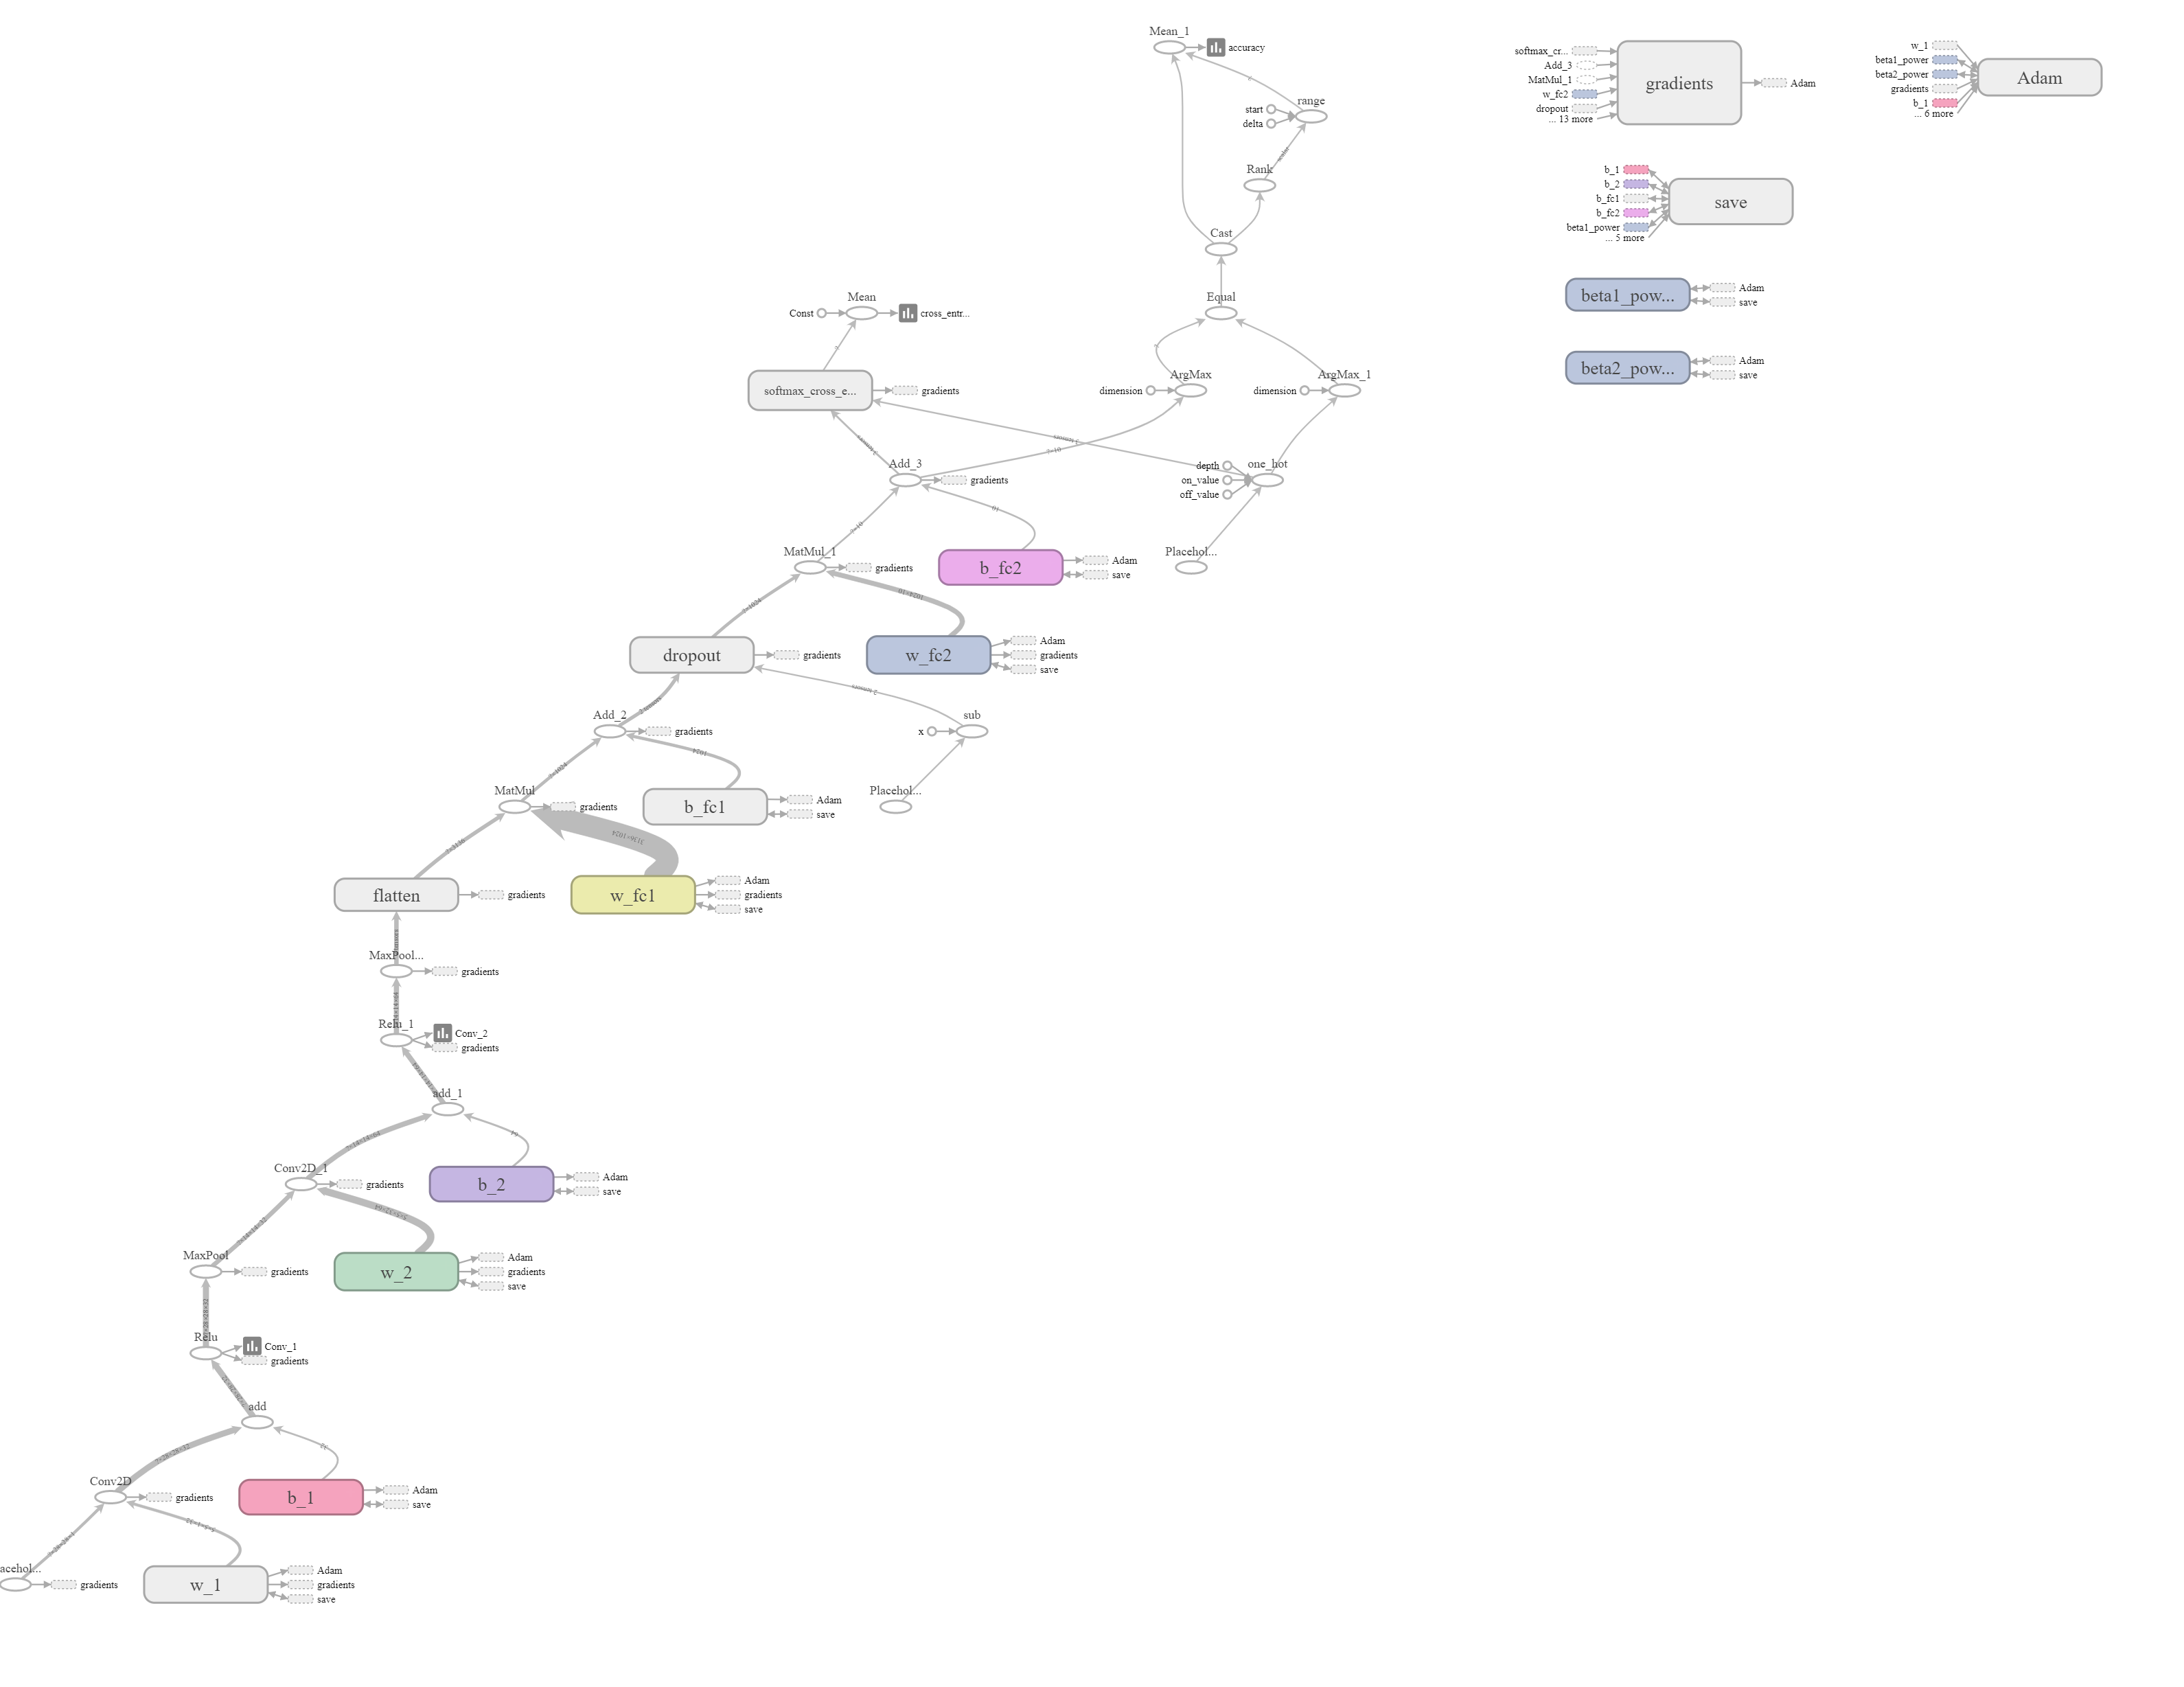

Also, using AdamOptimizer with learning_rate = 0.0001, the final training accuracy was 93.75 percent (=  0.9375) and training loss was 41.46 percent (=  0.4145758) at 100 epochs. Also the test accuracy was 56.9 percent which is not very high.
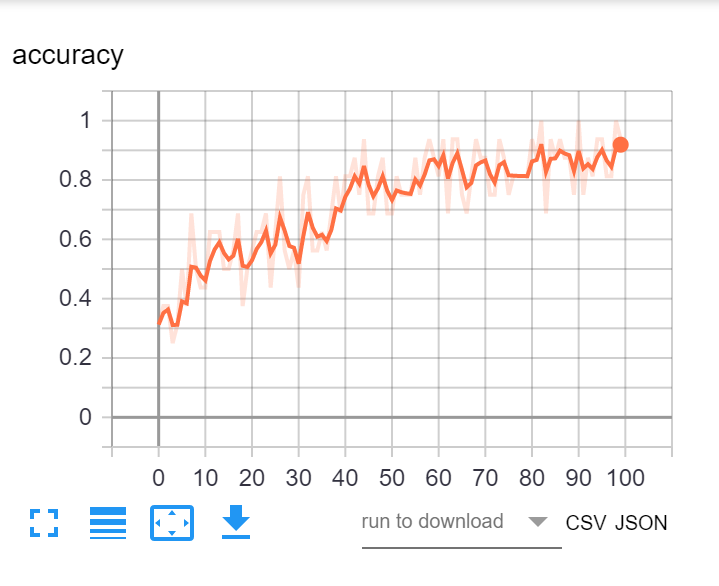
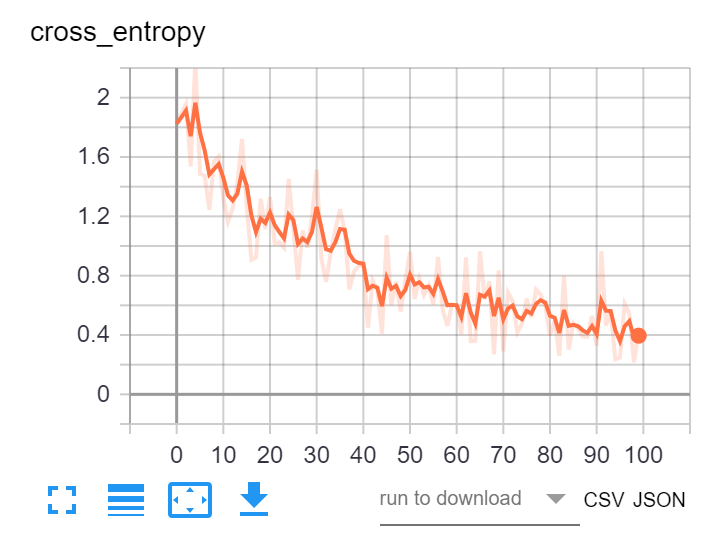
However, the highest training accuracy and training loss for all iteration was found to be 
epoch =  98 iteration =  78 batch loss =  0.21675661
epoch =  98 iteration =  78 accuracy =  1.0

Using tensorboard like the previous homework, the plot of histogram distribution of the weight for the first fully connected layer every  iterations can be seen below:

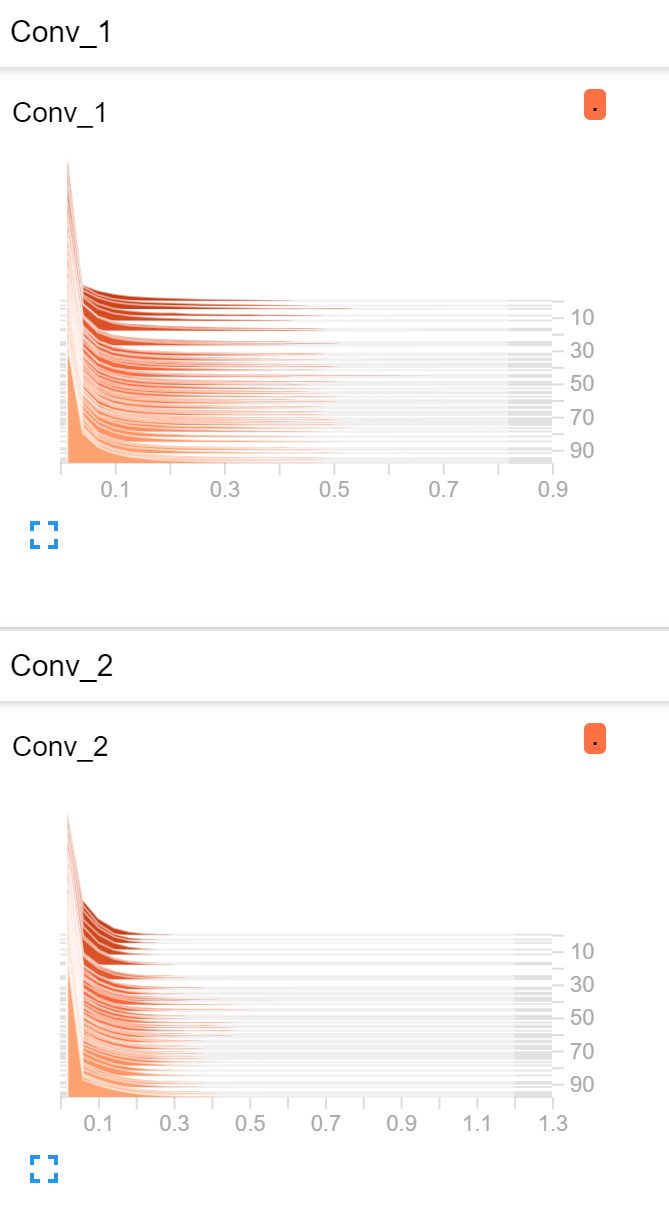
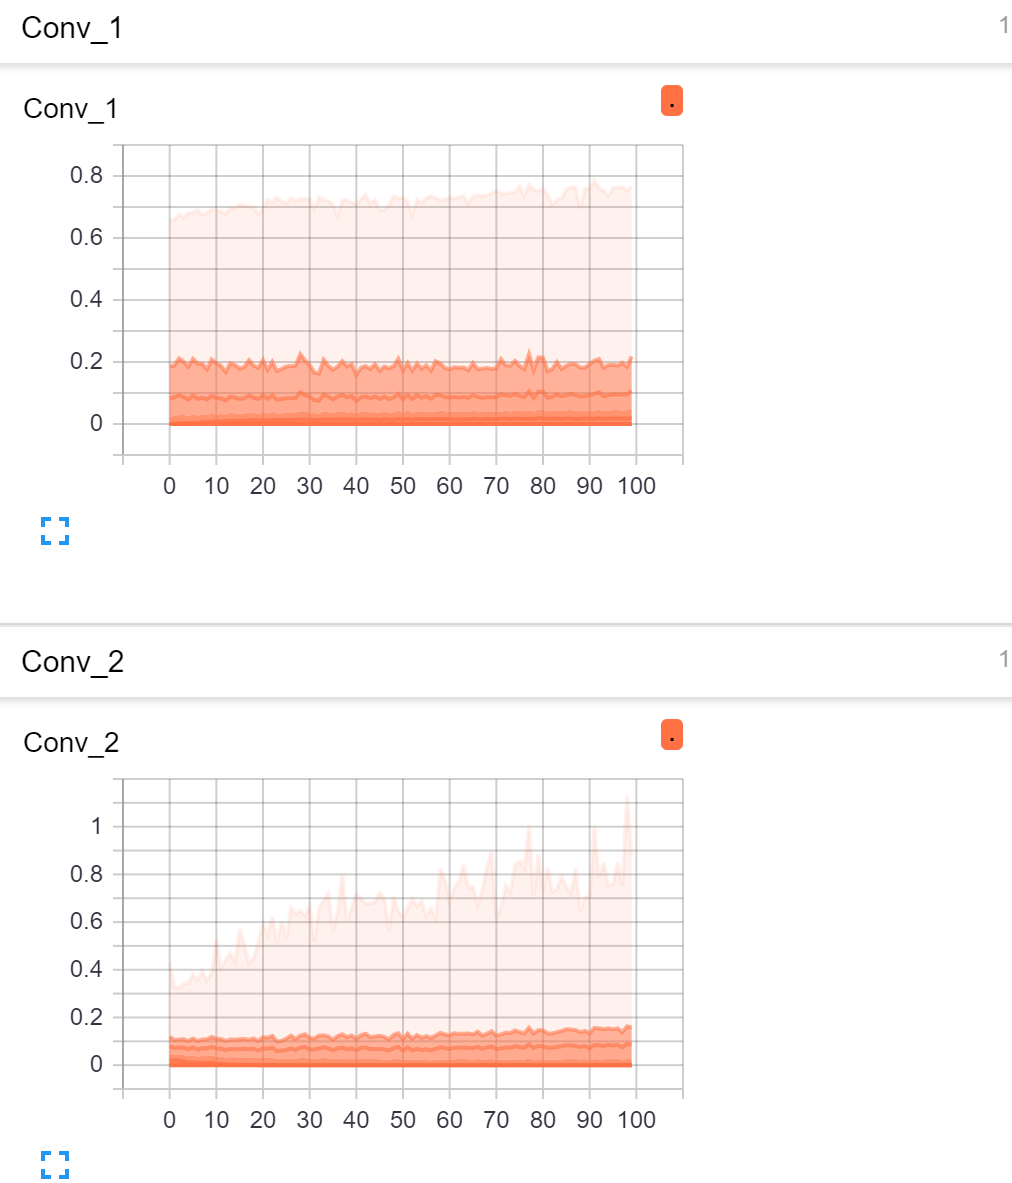

Also below are the test means and test standard deviations of the weighs in each layers:

Means for first layer: [0.016132174, 0.029338859, 0.01393891, 0.08973887, 0.031540327, 0.01676252, 0.22206718, 0.019344307, 0.013705693, 0.012988208, 0.037079323, 0.023153018, 0.01855602, 0.13712077, 0.041094296, 0.03676815, 0.098006554, 0.016511103, 0.025684064, 0.027391933, 0.05253628, 0.034088288, 0.03209313, 0.040605433, 0.029922921, 0.035356913, 0.3311147, 0.022650024, 0.02995678, 0.034102045, 0.020353775, 0.029478675]

Standard Deviation for first layer: [0.02915756, 0.038086936, 0.019988138, 0.082939364, 0.037936207, 0.027575852, 0.10899919, 0.024041682, 0.023784598, 0.019124055, 0.055252455, 0.030977795, 0.023042217, 0.086668625, 0.035565533, 0.057067554, 0.09598874, 0.030323485, 0.051125195, 0.031572353, 0.06088244, 0.04654906, 0.043900803, 0.063050024, 0.042631447, 0.046884242, 0.16524898, 0.028067151, 0.05684843, 0.04443655, 0.027996512, 0.043884825]

Means for second layer: [0.027298879, 0.035685092, 0.039673265, 0.033722837, 0.023302646, 0.036286287, 0.024474269, 0.0217095, 0.03454492, 0.025159061, 0.039617248, 0.031754762, 0.045082152, 0.027849874, 0.03100977, 0.025041549, 0.019566825, 0.023994189, 0.043361876, 0.04382928, 0.019488882, 0.032915432, 0.022974387, 0.040203024, 0.031487584, 0.03400421, 0.036882248, 0.027963633, 0.041905727, 0.039056685, 0.04042995, 0.030967383, 0.021435905, 0.045604263, 0.03226313, 0.032411434, 0.035416115, 0.03084651, 0.040136755, 0.048507094, 0.040806767, 0.032124583, 0.06491389, 0.044385165, 0.035522502, 0.045388885, 0.032178864, 0.027475057, 0.031259637, 0.040684305, 0.026635565, 0.018128056, 0.04145645, 0.03401644, 0.035258997, 0.037756484, 0.023261363, 0.039127298, 0.044950772, 0.024582645, 0.025254158, 0.016750393, 0.03599538, 0.04138647]

Standard Deviations for second layer: [0.061776217, 0.061587073, 0.06404622, 0.060734514, 0.051323842, 0.054099385, 0.06820811, 0.045092247, 0.059013527, 0.044423725, 0.07956225, 0.061532382, 0.06505881, 0.05579189, 0.05334235, 0.04876248, 0.045079656, 0.05396011, 0.07569376, 0.078639425, 0.035681777, 0.0620447, 0.04612172, 0.056052435, 0.062345088, 0.056784045, 0.07562206, 0.060737666, 0.073725335, 0.073596686, 0.07487188, 0.055628233, 0.053808376, 0.07811466, 0.06707132, 0.06298042, 0.054162603, 0.066521585, 0.063783616, 0.082595944, 0.081171766, 0.06784395, 0.12339037, 0.0820339, 0.058915436, 0.07345317, 0.066693954, 0.051331073, 0.042380318, 0.065567166, 0.061258085, 0.03704379, 0.08340636, 0.059124853, 0.074299484, 0.07128134, 0.044010922, 0.073321484, 0.09325731, 0.047742385, 0.056028005, 0.036077257, 0.066954054, 0.07184373]








We noticed by trying different learning rate we discover several thigs and below are some of these discoveries:

Using learning rate = 0.001 an increase from the 0.0001 used in this report. We have acheived epoch =  22 iteration =  78 batch loss =  0.17137559 accuracy =  1.0 and the test accuracy = 0.501
The training accuracy = 1 did not changed however the loss continues to reduce unitl 0.030311339 at the end of al  epochs. 
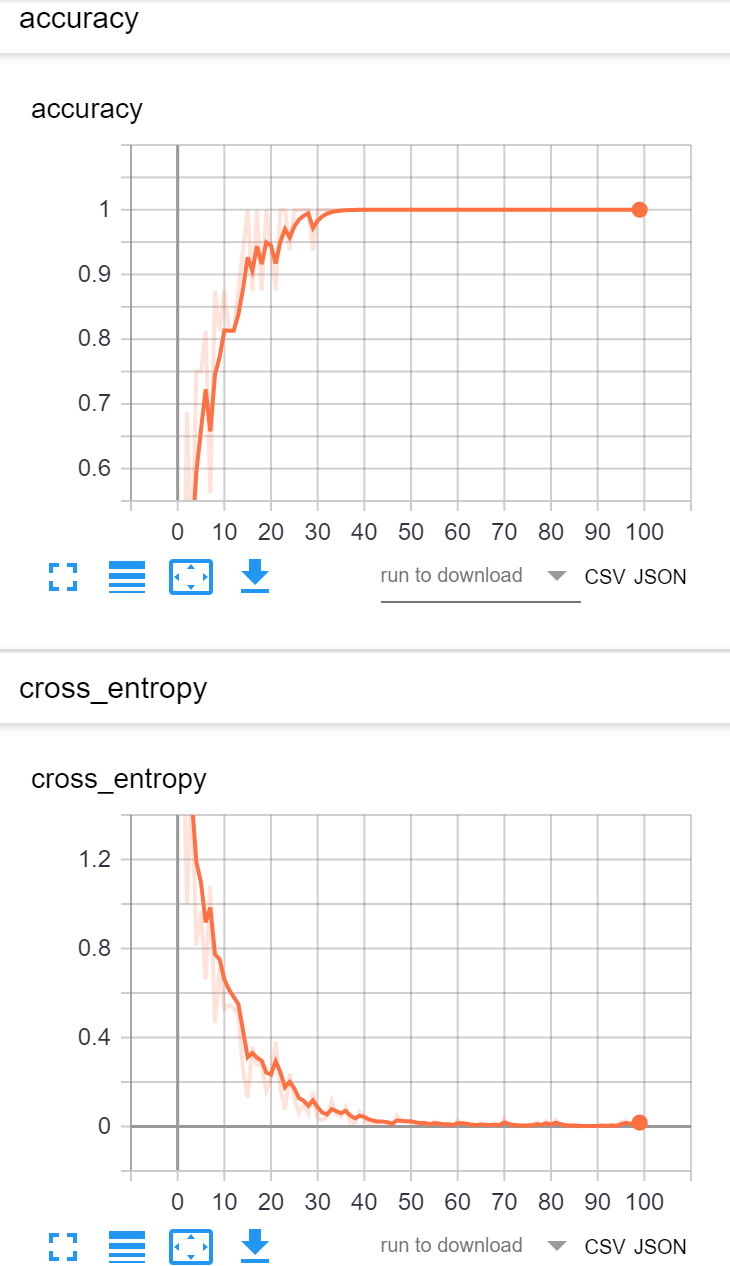

However, using learning rate = 0.00001 a decrease from the 0.0001 used in this report. We have loss =  1.6505405 and accuracy =  0.5625 at the end of training and the test accuracy = 0.451. This is not a good choice.
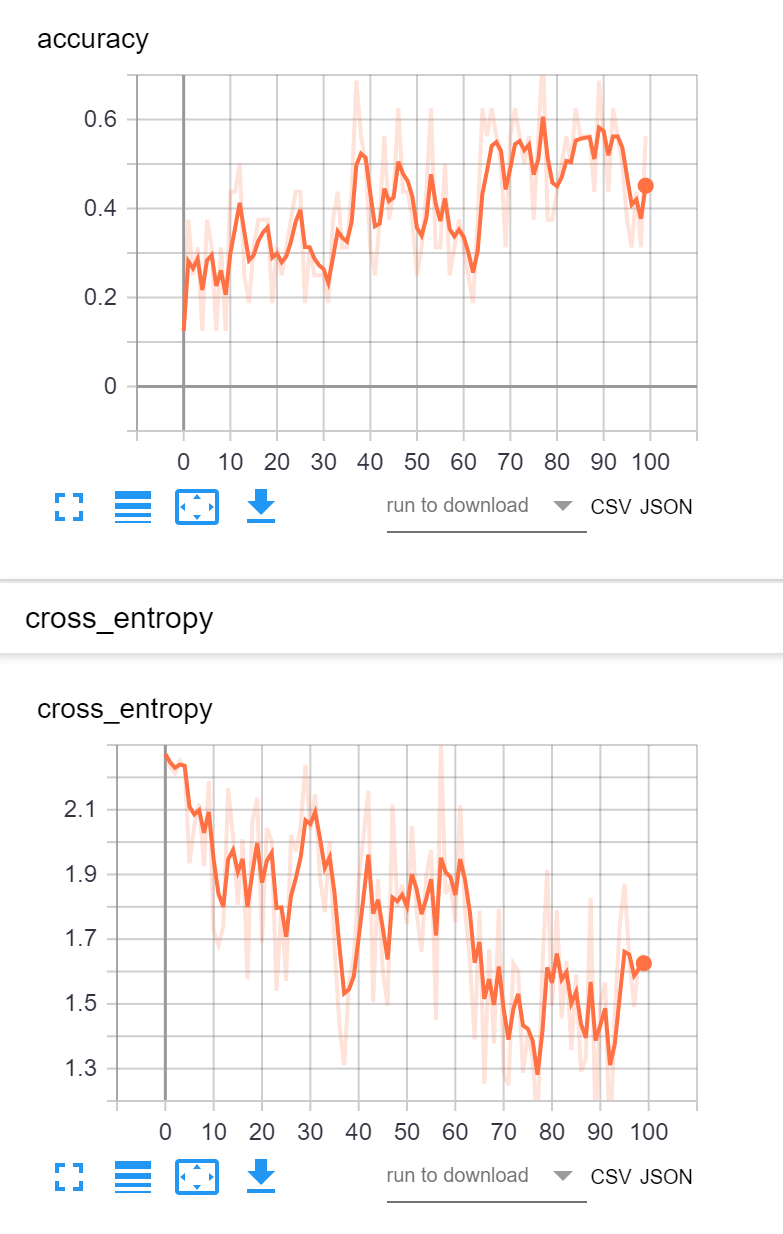

In [1]:
from scipy import misc
import numpy as np
import tensorflow as tf
import random
import pylab as pl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib as mp
from visualize_weights import nice_imshow, make_mosaic

# --------------------------------------------------
# setup
result_dir = 'result_summary/'

def weight_variable(shape):
    '''
    Initialize weights
    :param shape: shape of weights, e.g. [w, h ,Cin, Cout] where
    w: width of the filters
    h: height of the filters
    Cin: the number of the channels of the filters
    Cout: the number of filters
    :return: a tensor variable for weights with initial values
    '''

    # IMPLEMENT YOUR WEIGHT_VARIABLE HERE
    initial = tf.truncated_normal(shape)
    W = tf.Variable(initial)

    return W

def weight_(shape, name, init):
    w = tf.get_variable(name=name, shape=shape, initializer=init, dtype=tf.float32)

    return w

def bias_variable(shape):
    '''
    Initialize biases
    :param shape: shape of biases, e.g. [Cout] where
    Cout: the number of filters    :return: a tensor variable for biases with initial values
    '''

    # IMPLEMENT YOUR BIAS_VARIABLE HERE
    initial = tf.constant(0.1, shape=shape)
    b = tf.Variable(initial)

    return b

def conv2d(x, W):
    '''
    Perform 2-D convolution
    :param x: input tensor of size [N, W, H, Cin] where
    N: the number of images
    W: width of images
    H: height of images
    Cin: the number of channels of images
    :param W: weight tensor [w, h, Cin, Cout]
    w: width of the filters
    h: height of the filters
    Cin: the number of the channels of the filters = the number of channels of images
    Cout: the number of filters
    :return: a tensor of features extracted by the filters, a.k.a. the results after convolution
    '''

    # IMPLEMENT YOUR CONV2D HERE
    h_conv = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

    return h_conv

def max_pool_2x2(x):
    '''
    Perform non-overlapping 2-D maxpooling on 2x2 regions in the input data
    :param x: input data
    :return: the results of maxpooling (max-marginalized + downsampling)
    '''

    # IMPLEMENT YOUR MAX_POOL_2X2 HERE
    h_max = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    return h_max


ntrain = 1000 # per class
ntest = 100  # per class
nclass = 10  # number of classes
imgwidth = 28
imgheight = 28
imsize = imgwidth * imgheight
nchannels = 1
batchsize = 128
max_step = 100

Train = np.zeros((ntrain*nclass,imgwidth,imgheight,nchannels))
Test = np.zeros((ntest*nclass,imgwidth,imgheight,nchannels))
LTrain = np.zeros((ntrain*nclass,nclass))
LTest = np.zeros((ntest*nclass,nclass))

itrain = -1
itest = -1
for iclass in range(0, nclass):
    for isample in range(0, ntrain):
        path = 'CIFAR10/Train/%d/Image%05d.png' % (iclass,isample)
        im = misc.imread(path);  # 28 by 28
        im = im.astype(float) / 255
        itrain += 1
        Train[itrain,:,:,0] = im
        LTrain[itrain,iclass] = 1 # 1-hot lable
    for isample in range(0, ntest):
        path = 'CIFAR10/Test/%d/Image%05d.png' % (iclass,isample)
        im = misc.imread(path);  # 28 by 28
        im = im.astype(float) / 255
        itest += 1
        Test[itest,:,:,0] = im
        LTest[itest,iclass] = 1 # 1-hot lable

sess = tf.InteractiveSession()

tf_data = tf.placeholder(tf.float32, [None, 28, 28, 1]) #tf variable for the data, remember shape is [None, width, height, numberOfChannels] 
tf_labels = tf.one_hot(tf.placeholder(tf.uint8), 10) #tf variable for labels
keep_prob = tf.placeholder(tf.float32)

# --------------------------------------------------
# model
#create your model
W_conv1 = weight_(shape = [5, 5, 1, 32],name='w_1', init= tf.contrib.layers.xavier_initializer())
b_conv1 = weight_(shape = [32], name='b_1', init= tf.constant_initializer(value=0))
h_conv1 = tf.nn.relu(conv2d(tf_data, W_conv1) + b_conv1)
tf.summary.histogram(('Conv_1'),h_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# second convolutional layer
W_conv2 = weight_(name='w_2', shape=[5, 5, 32, 64], init=tf.contrib.layers.xavier_initializer())
b_conv2 = weight_(name='b_2', shape =[64], init= tf.constant_initializer(value=0))
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
tf.summary.histogram('Conv_2', h_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_(shape=[7 * 7 * 64, 1024], name='w_fc1', init=tf.contrib.layers.xavier_initializer())
b_fc1 = weight_(shape=[1024], name='b_fc1', init=tf.constant_initializer(value=0))
h_pool2_flat = tf.layers.flatten(h_pool2)
h_fc1 = tf.add(tf.matmul(h_pool2_flat, W_fc1), b_fc1)

# dropout
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# softmax
W_fc2 = weight_(name='w_fc2', shape=[1024, 10], init=tf.contrib.layers.xavier_initializer())
b_fc2 = weight_(name='b_fc2', shape=[10], init=tf.constant_initializer(value=0))
y_conv = tf.add(tf.matmul(h_fc1_drop, W_fc2), b_fc2)


def data_iterator(train_images, train_labels, batch_size):
    """ A simple data iterator """
    n = train_images.shape[0]
    # batch_idx = 0
    while True:

        shuf_idxs = np.random.permutation(n).reshape((1, n))[0]
        shuf_images = train_images[shuf_idxs]
        shuf_labels = train_labels[shuf_idxs]

        for batch_idx in range(0, n, batch_size):
            # print(shuf_idxs[batch_idx: batch_idx + batch_size])
            batch_images = shuf_images[batch_idx: batch_idx + batch_size]
            batch_labels = shuf_labels[batch_idx: batch_idx + batch_size]
            yield batch_images, batch_labels
            

# --------------------------------------------------
# loss
#set up the loss, optimization, evaluation, and accuracy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_conv, labels=tf_labels))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cross_entropy)
pred_idx = tf.argmax(y_conv, 1)
y_idx = tf.argmax(tf_labels, 1)
correct_prediction = tf.equal(pred_idx, y_idx)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))

tf.summary.scalar("cross_entropy", cross_entropy)
tf.summary.scalar("accuracy", accuracy)

summary_op = tf.summary.merge_all()

saver = tf.train.Saver()
summary_writer = tf.summary.FileWriter(result_dir, sess.graph)


# --------------------------------------------------
# optimization

sess.run(tf.global_variables_initializer())
#batch_xs = np.zeros([batchsize, imwidth, imheight, nchannels]) #setup as [batchsize, width, height, numberOfChannels] and use np.zeros()
#batch_ys = np.zeros([batchsize, nclass]) #setup as [batchsize, the how many classes] 

iter_ = data_iterator(Train, LTrain, batchsize)
n_batch = len(LTrain) // batchsize + 1

for epoch in range(max_step):
    for i in range(n_batch): # try a small iteration size once it works then continue
        batch_x, batch_y = next(iter_)
        sess.run(optimizer, feed_dict={tf_data: batch_x, tf_labels: batch_y, keep_prob: 0.5})
        

        # perm = np.arange(nsamples)
        # np.random.shuffle(perm)
       # for j in range(batchsize):
           # batch_xs[j,:,:,:] = Train[perm[j],:,:,:]
           # batch_ys[j,:] = LTrain[perm[j],:]
       # if i%10 == 0:
        if i == n_batch-1:
            batch_loss, summ, accu = sess.run([cross_entropy, summary_op, accuracy],
                                feed_dict={tf_data: batch_x, tf_labels: batch_y, keep_prob: 1.0})
            summary_writer.add_summary(summ, epoch)
            print("epoch = ", epoch, "iteration = ", i, "batch loss = ", batch_loss)
            print("epoch = ", epoch, "iteration = ", i, "accuracy = ", accu)
            #calculate train accuracy and print it
     #   optimizer.run(feed_dict={}) # dropout only during training
    
    
# visualize weights
W_c = sess.run(W_conv1)
W_c2 = W_c[:, :, 0, :]
print(W_c.shape)
print('W_c[0]:', W_c[0])
W = np.transpose(W_c2, (2, 0, 1))
plt.figure(figsize=(15, 15))
plt.title('conv1 weights')
nice_imshow(plt.gca(), make_mosaic(W, 6, 6), cmap=cm.binary)
plt.close()

# --------------------------------------------------
# test
test_stat = sess.run(h_conv1, feed_dict={tf_data: Test, tf_labels: LTest, keep_prob: 1.0})
test_stat2 = sess.run(h_conv2, feed_dict={tf_data: Test, tf_labels: LTest, keep_prob: 1.0})


test_mean = []
test_sd = []
for i in range(32):
    ax = plt.subplot(8, 4, i+1)

    data_stat = test_stat[:, :, :, i].flatten()
    plt.hist(data_stat)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    test_mean.append(np.mean(data_stat))
    test_sd.append(np.std(data_stat))


print("Means for first layer:", test_mean)
print("Standard Deviation for first layer:", test_sd)

plt.close()

test_mean = []
test_sd = []
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)

    data_stat = test_stat2[:, :, :, i].flatten()
    plt.hist(data_stat)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    test_mean.append(np.mean(data_stat))
    test_sd.append(np.std(data_stat))


#plt.savefig('Images/hist_conv21_all.png')
#plt.close()

for i in range(32,64):
    ax = plt.subplot(8, 4, i - 31)

    data_stat = test_stat2[:, :, :, i].flatten()
    plt.hist(data_stat)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    test_mean.append(np.mean(data_stat))
    test_sd.append(np.std(data_stat))


#plt.savefig('Images/hist_conv22_all.png')
#plt.close()
print("Means for second layer:", test_mean)
print("Standard Deviations for second layer:", test_sd)

print("test accuracy %g"%accuracy.eval(feed_dict={tf_data: Test, tf_labels: LTest, keep_prob: 1.0}))


sess.close()

C:\Users\oyeoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:104: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Users\oyeoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:111: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
W1105 03:53:39.478218  3556 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1105 03:53:39.538094  3556 deprecation.py:323] From <ipython-input-1-852a5042b36a>:141: flatten (from tensorflow.python.layers.core) is deprecated and will b

epoch =  0 iteration =  78 batch loss =  1.8244528
epoch =  0 iteration =  78 accuracy =  0.3125
epoch =  1 iteration =  78 batch loss =  1.8932481
epoch =  1 iteration =  78 accuracy =  0.375
epoch =  2 iteration =  78 batch loss =  1.9573536
epoch =  2 iteration =  78 accuracy =  0.375
epoch =  3 iteration =  78 batch loss =  1.5367157
epoch =  3 iteration =  78 accuracy =  0.25
epoch =  4 iteration =  78 batch loss =  2.2576995
epoch =  4 iteration =  78 accuracy =  0.3125
epoch =  5 iteration =  78 batch loss =  1.4862906
epoch =  5 iteration =  78 accuracy =  0.5
epoch =  6 iteration =  78 batch loss =  1.4745551
epoch =  6 iteration =  78 accuracy =  0.375
epoch =  7 iteration =  78 batch loss =  1.2446125
epoch =  7 iteration =  78 accuracy =  0.6875
epoch =  8 iteration =  78 batch loss =  1.5704011
epoch =  8 iteration =  78 accuracy =  0.5
epoch =  9 iteration =  78 batch loss =  1.6041176
epoch =  9 iteration =  78 accuracy =  0.4375
epoch =  10 iteration =  78 batch loss = 

epoch =  84 iteration =  78 batch loss =  0.30215442
epoch =  84 iteration =  78 accuracy =  0.9375
epoch =  85 iteration =  78 batch loss =  0.47866255
epoch =  85 iteration =  78 accuracy =  0.875
epoch =  86 iteration =  78 batch loss =  0.44681364
epoch =  86 iteration =  78 accuracy =  0.9375
epoch =  87 iteration =  78 batch loss =  0.3899202
epoch =  87 iteration =  78 accuracy =  0.875
epoch =  88 iteration =  78 batch loss =  0.3874218
epoch =  88 iteration =  78 accuracy =  0.875
epoch =  89 iteration =  78 batch loss =  0.5285255
epoch =  89 iteration =  78 accuracy =  0.75
epoch =  90 iteration =  78 batch loss =  0.328458
epoch =  90 iteration =  78 accuracy =  1.0
epoch =  91 iteration =  78 batch loss =  0.9653034
epoch =  91 iteration =  78 accuracy =  0.75
epoch =  92 iteration =  78 batch loss =  0.46339768
epoch =  92 iteration =  78 accuracy =  0.875
epoch =  93 iteration =  78 batch loss =  0.5583911
epoch =  93 iteration =  78 accuracy =  0.8125
epoch =  94 iterat

C:\Users\oyeoy\Anaconda3\lib\site-packages\ipykernel_launcher.py:273: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Means for second layer: [0.027298879, 0.035685092, 0.039673265, 0.033722837, 0.023302646, 0.036286287, 0.024474269, 0.0217095, 0.03454492, 0.025159061, 0.039617248, 0.031754762, 0.045082152, 0.027849874, 0.03100977, 0.025041549, 0.019566825, 0.023994189, 0.043361876, 0.04382928, 0.019488882, 0.032915432, 0.022974387, 0.040203024, 0.031487584, 0.03400421, 0.036882248, 0.027963633, 0.041905727, 0.039056685, 0.04042995, 0.030967383, 0.021435905, 0.045604263, 0.03226313, 0.032411434, 0.035416115, 0.03084651, 0.040136755, 0.048507094, 0.040806767, 0.032124583, 0.06491389, 0.044385165, 0.035522502, 0.045388885, 0.032178864, 0.027475057, 0.031259637, 0.040684305, 0.026635565, 0.018128056, 0.04145645, 0.03401644, 0.035258997, 0.037756484, 0.023261363, 0.039127298, 0.044950772, 0.024582645, 0.025254158, 0.016750393, 0.03599538, 0.04138647]
Standard Deviations for second layer: [0.061776217, 0.061587073, 0.06404622, 0.060734514, 0.051323842, 0.054099385, 0.06820811, 0.045092247, 0.059013527, 0.0